In [16]:
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')

#Insallations
!pip3 install cvlib==0.2.2
!pip3 install opencv-python==4.1.1.26
!pip3 install matplotlib==3.1.1
!pip3 install Keras==2.2.5
!pip3 install scikit-image

In [17]:
#Verify versions
from platform import python_version
import tensorflow
import keras
import cvlib as cv
import cv2

print('Python version: {}'.format(python_version()))
print('cvlib version: {}'.format(cv.__version__))
print('OpenCV version: {}'.format(cv2.__version__))
print('Tensorflow version: {}'.format(tensorflow.__version__))
print('Keras version: {}'.format(keras.__version__))

Python version: 3.7.4
cvlib version: 0.2.2
OpenCV version: 4.1.1
Tensorflow version: 1.14.0
Keras version: 2.2.5


## Car Detection on Images using local and url images

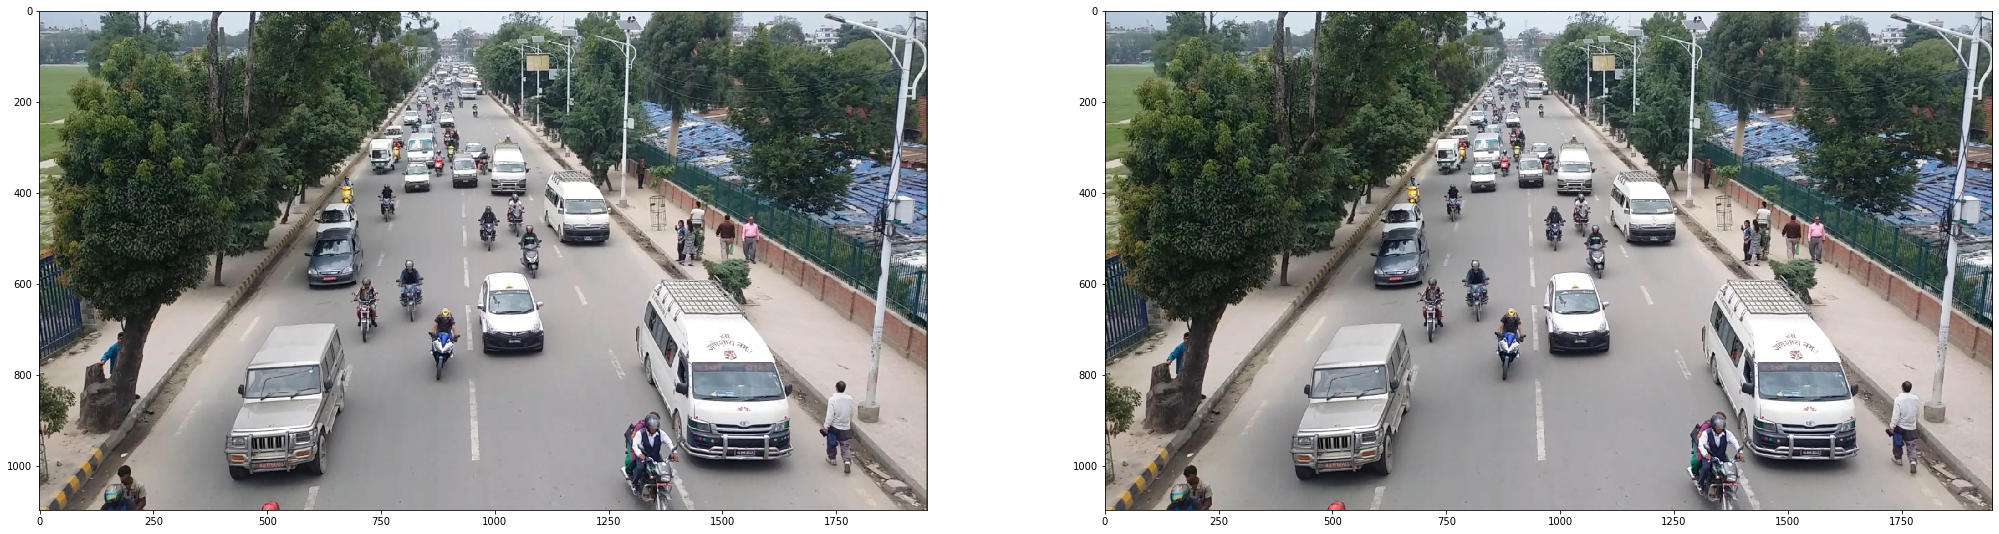

Number of cars in the image is 0


In [18]:
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox
import time
%matplotlib inline


# Uncomment this to read image from local folder/directory
#im = cv2.imread('cars.jpeg')

# Comment the above line to read image from local folder/directory and Uncomment the following two lines if you are reading imgae from a url
from skimage import io
# Use any of the image or change url to your custom url
im = io.imread('https://storage.googleapis.com/kaggle-datasets-images/1468/2624/1ee3a0202dd0c809776f0f16b46e8c96/dataset-original.jpg')
# im = io.imread('http://www.burlingtongazette.ca/wp-content/uploads/HOV-lane-during-Pan-Am.jpg')
plt.figure(figsize=(35,15))
plt.subplot(121)
plt.imshow(im)

bbox, label, conf = cv.detect_common_objects(im, confidence=0.5, model='tiny-yolov3')
output_image = draw_bbox(im, bbox, label, conf)

plt.subplot(122)
plt.imshow(output_image)
plt.show()
print('Number of cars in the image is ' + str(label.count('car')))


## Car Detection and Tracking on videos

In [10]:
import numpy as np
import cv2

color = (0,255,255)
WHITE = (255, 255, 255)
YELLOW = (66, 244, 238)
GREEN = (80, 220, 60)
LIGHT_CYAN = (255, 255, 224)
DARK_BLUE = (139, 0, 0)
GRAY = (128, 128, 128)
fontface = cv2.FONT_HERSHEY_SIMPLEX



cap = cv2.VideoCapture('cars.mp4')


# Define the codec and create VideoWriter object
# fourcc = cv2.cv.CV_FOURCC(*'DIVX')
# out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
                                                                                 
#         frame = cv2.flip(frame,0)
#         write the flipped frame
#         out.write(frame)
                                                                                 
                                                                                 
        bbox, label, conf = cv.detect_common_objects(frame, model='tiny-yolov3')
        output_image = draw_bbox(frame, bbox, label, conf)
        
        output_image = np.array(output_image)
        oH,oW = output_image.shape[:2]
        ROI_YMAX = int(round(oH * 0.75))  # Bottom quarter = finish line
        ROI = int(round(oH * 0.71))  # Bottom quarter = finish line
        line = [(0, ROI), (oW, ROI)]
        
#         print('Number of cars in the image is ' + str(label.count('car')))
        count = str(label.count('car'))
        cv2.putText(output_image, "Number of Cars in the frame are :", (((oW//3)//2)-12, ROI_YMAX + 50), fontface, 1, LIGHT_CYAN, 2, cv2.LINE_AA)
        cv2.putText(output_image, str(count), (((oW//3)//2)-5, ROI_YMAX + 100), fontface, 1, LIGHT_CYAN, 2, cv2.LINE_AA)
        cv2.imshow('Car Tracking and Counting',output_image)
#         print('Number of cars in the image is ' + str(label.count('car')))
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release everything if job is finished


KeyboardInterrupt: 

In [5]:
help(cv.detect_common_objects)

Help on function detect_common_objects in module cvlib.object_detection:

detect_common_objects(image, confidence=0.5, nms_thresh=0.3, model='yolov3')

